## 项目数据探索

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("bmh")
plt.rc('font', family='SimHei', size=13)
%matplotlib inline

import os

In [2]:
# 导入数据集
data_train = pd.read_csv('../Data/cs-training.csv')
data_test = pd.read_csv('../Data/cs-test.csv')

In [6]:
data_train.head(5)

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
Unnamed: 0                              150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


通过观察,发现含有缺失值的特征有两个 MonthlyIncome，NumberOfDependents

In [5]:
data_train.describe()

/home/python/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,NaN,5.000000,0.000000,0.000000,0.000000,NaN
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,NaN,8.000000,0.000000,1.000000,0.000000,NaN
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,NaN,11.000000,0.000000,2.000000,0.000000,NaN
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
# 替换长的特征名称
columns = ({'SeriousDlqin2yrs':'IsDlq',
            'RevolvingUtilizationOfUnsecuredLines':'Revol',
           'NumberOfOpenCreditLinesAndLoans':'NumOpen',
           'NumberOfTimes90DaysLate':'Num90late',
           'NumberRealEstateLoansOrLines':'NumEstate',
           'NumberOfTime60-89DaysPastDueNotWorse':'Num60-89late',
           'NumberOfDependents':'NumDependents',
           'NumberOfTime30-59DaysPastDueNotWorse':'Num30-59late'}
          )
data_train.rename(columns=columns,inplace = True)
data_test.rename(columns=columns,inplace = True)

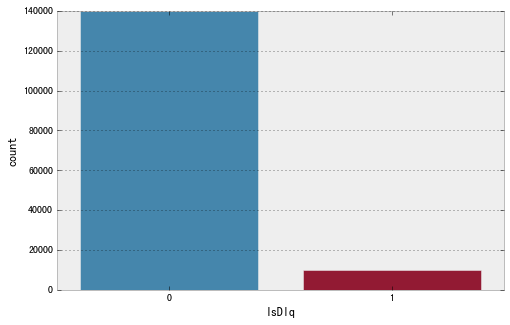

In [29]:
plt.figure(figsize = (8,5))
sns.countplot("IsDlq", data=data_train)
plt.show()

## 好坏比

In [14]:
badNum = data_train[data_train['IsDlq']==1].shape[0]
goodNum = data_train[data_train['IsDlq']==0].shape[0]
print('训练集中客户好坏比为：{0}%'.format(round(badNum*100/(goodNum+badNum),2)))

训练集中客户好坏比为：6.68%


样本不均衡后续建模部分进行处理

## 特征分布

/home/python/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


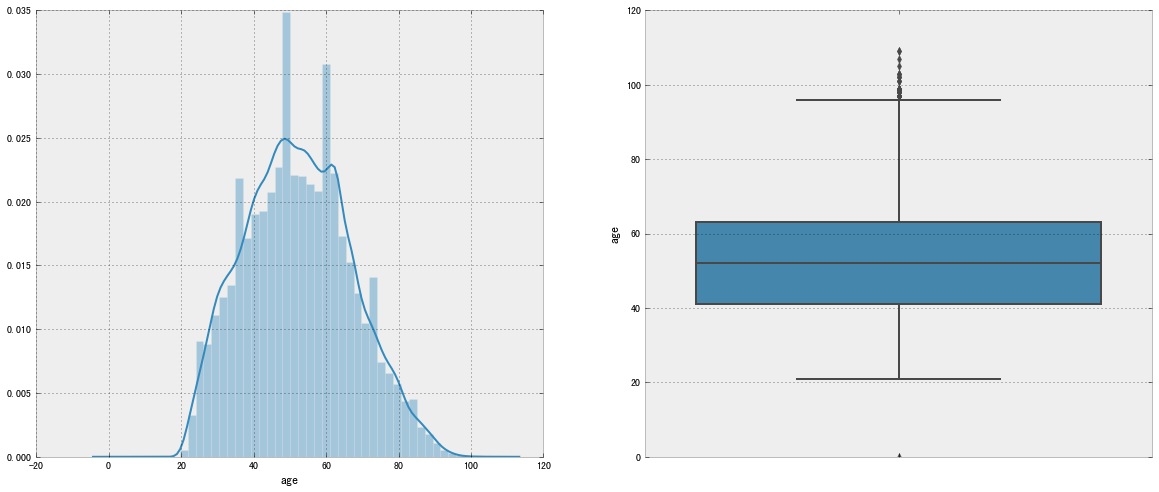

In [15]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,8))
sns.distplot(data_train['age'],ax=ax1)
sns.boxplot(y='age',data=data_train,ax=ax2)
plt.show()

In [17]:
# 四分位距观察异常值
agePercentile = np.percentile(data_train['age'],[0,25,50,75,100])
ageIQR = agePercentile[3] - agePercentile[1]
ageUpLimit = agePercentile[3]+ageIQR*1.5
ageDownLimit = agePercentile[1]-ageIQR*1.5
print('年龄异常值上限为：{0}, 下限为：{1}'.format(ageUpLimit,ageDownLimit))
print('上届异常值占比：{0} %'.format(data_train[data_train['age']>96].shape[0]*100/data_train.shape[0]))
print('下届异常值占比：{0} %'.format(data_train[data_train['age']<8].shape[0]*100/data_train.shape[0]))

年龄异常值上限为：96.0, 下限为：8.0
上届异常值占比：0.03 %
下届异常值占比：0.0006666666666666666 %


In [18]:
data_train[data_train['age']<=8]

,Unnamed: 0,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents
65695,65696,0,1.0,0,1,0.436927,6000.0,6,0,2,0,2.0


In [19]:
data_train[data_train['age']>96].head(5)

,Unnamed: 0,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents
436,437,0,0.007000,97,0,3.000000,NaN,2,0,0,0,NaN
2922,2923,0,0.005043,99,0,800.000000,NaN,5,0,0,0,NaN
7763,7764,0,0.069167,101,0,50.000000,NaN,2,0,0,0,0.0
9359,9360,0,0.000000,97,0,0.000000,0.0,3,0,0,0,0.0
9870,9871,0,0.012737,98,0,0.006503,2152.0,6,0,0,0,0.0


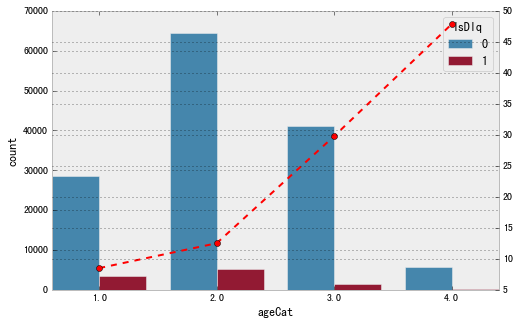

In [30]:

# 对age分箱观察一下年龄段对延期用户的影响
data_train['ageCat'] = np.nan
data_train.loc[(data_train['age']>18)&(data_train['age']<40),'ageCat'] = 1 
data_train.loc[(data_train['age']>=40)&(data_train['age']<60),'ageCat'] = 2 
data_train.loc[(data_train['age']>=60)&(data_train['age']<80),'ageCat'] = 3
data_train.loc[(data_train['age']>=80),'ageCat'] = 4

gbRatioList = {}
for m in data_train['ageCat'].value_counts().index:
    data = data_train.loc[data_train['ageCat']==m]
    gbRatio = data.loc[data['IsDlq']==0].shape[0]/data.loc[data['IsDlq']==1].shape[0]
    gbRatioList[m] = gbRatio
        
f,ax = plt.subplots(figsize=(8,5))
sns.countplot('ageCat', hue='IsDlq', data=data_train, ax=ax)
ax2 = ax.twinx()
ax2.plot(sorted([x-1 for x in gbRatioList.keys()]), sorted([round(x,2) for x in gbRatioList.values()]),'ro--',linewidth=2)
plt.savefig('0.png')
plt.show()

**结论**：可以看到年龄越大，好坏比越大，说明随着年龄增大，违约的比例逐渐减少。这为我们后面woe分箱提供了参考，呈现了单调性。

In [32]:
data_train['agecut'] = pd.cut(data_train['age'],[18,40,60,80,109])

In [50]:
pd.crosstab(data_train['agecut'],data_train['IsDlq'])

IsDlq,0,1
agecut,,
"(18, 40]",31462,3634
"(40, 60]",64801,5042
"(60, 80]",38874,1250
"(80, 109]",4836,100


### RevolvingUtilizationOfUnsecuredLines特征

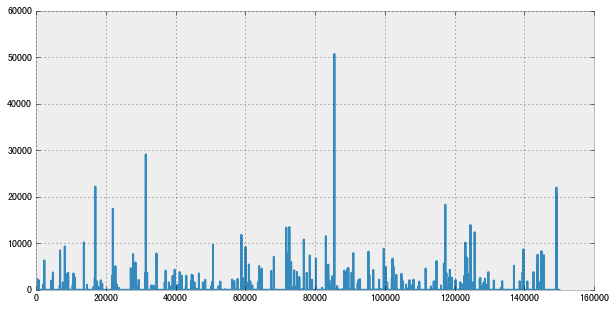

In [67]:
f,ax=plt.subplots(figsize=(10,5))
plt.plot(data_train.index,data_train['Revol'])
plt.show()

In [73]:
data_train['Revol'].describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: Revol, dtype: float64

In [74]:
cats = pd.cut(data_train['Revol'],5)

In [81]:
cats.value_counts()

(-50.708, 10141.6]    149984
(10141.6, 20283.2]        11
(20283.2, 30424.8]         4
(40566.4, 50708]           1
(30424.8, 40566.4]         0
Name: Revol, dtype: int64

In [85]:
# 四分位距观察异常值
revolPercentile = np.percentile(data_train['Revol'],[0,25,50,75,100])
revolIQR = revolPercentile[3] - revolPercentile[1]
revolUpLimit = revolPercentile[3]+revolIQR*1.5
revolDownLimit = revolPercentile[1]-revolIQR*1.5
print('异常值上限为：{0}, 下限为：{1}'.format(revolUpLimit,revolDownLimit))
print('上届异常值占比：{0} %'.format(round(data_train[data_train['Revol']>revolUpLimit].shape[0]*100/data_train.shape[0],2)))
print('下届异常值占比：{0} %'.format(round(data_train[data_train['Revol']<revolDownLimit].shape[0]*100/data_train.shape[0],2)))

异常值上限为：1.35281445575, 下限为：-0.7639007662499999
上届异常值占比：0.51 %
下届异常值占比：0.0 %


2.我们进一步观察一下上述结果是否准确。

由于特征值跨度太大，数量分布极其不均匀，因此将特征值分段观察分布情况。

/home/python/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


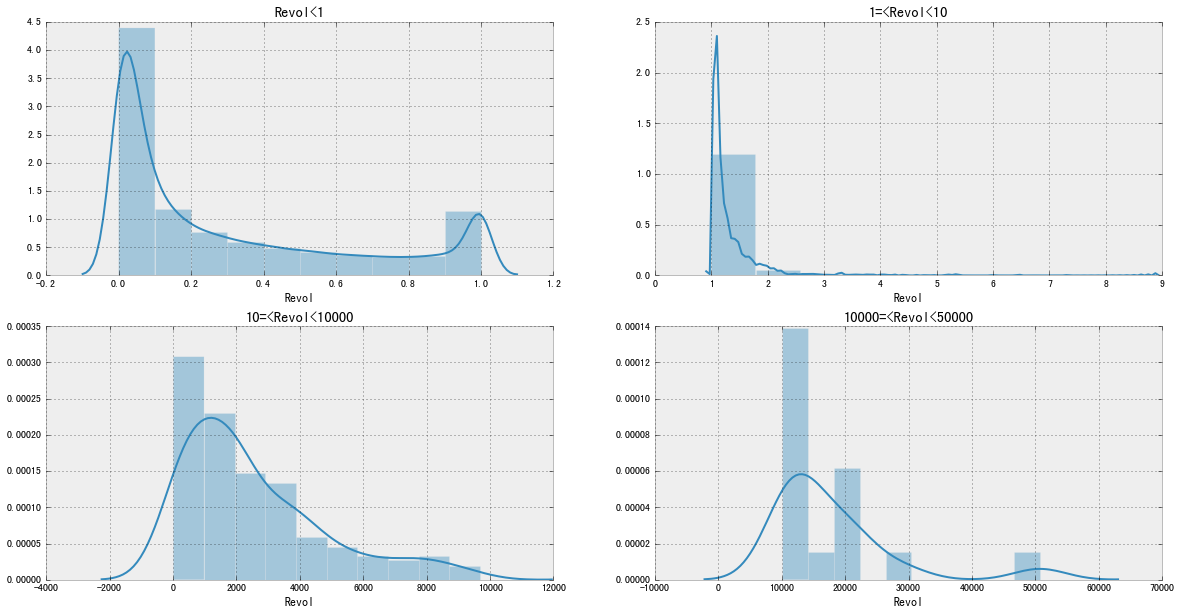

小于1数量占总数量比为：97.77466666666666%
大于等于1的数量为：3338


In [86]:
# 观察RevolvingUtilizationOfUnsecuredLines特征分布
f,[[ax1,ax2],[ax3,ax4]]=plt.subplots(2,2,figsize=(20,10))
sns.distplot(data_train.loc[data_train['Revol']<1,'Revol'],bins=10,ax=ax1)
sns.distplot(data_train.loc[(data_train['Revol']>=1)&(data_train['Revol']<10),'Revol'],bins=10,ax=ax2)
sns.distplot(data_train.loc[(data_train['Revol']>=10)&(data_train['Revol']<10000),'Revol'],bins=10,ax=ax3)
sns.distplot(data_train.loc[(data_train['Revol']>=10000)&(data_train['Revol']<52000),'Revol'],bins=10,ax=ax4)
ax1.set_title('Revol<1')
ax2.set_title('1=<Revol<10')
ax3.set_title('10=<Revol<10000')
ax4.set_title('10000=<Revol<50000')
plt.show()

print('小于1数量占总数量比为：{0}%'.format(data_train.loc[data_train['Revol']<1].shape[0]*100/data_train.shape[0]))
print('大于等于1的数量为：{0}'.format(data_train.loc[data_train['Revol']>=1].shape[0]))

In [87]:
# 特征值为10到100之间
data_train[(data_train['Revol']>10)&(data_train['Revol']<100)]

,Unnamed: 0,IsDlq,Revol,age,Num30-59late,DebtRatio,MonthlyIncome,NumOpen,Num90late,NumEstate,Num60-89late,NumDependents,ageCat,agecut
16642,16643,1,14.540918,45,3,1.151865,3726.0,11,0,2,7,3.0,2.0,"(40, 60]"
23292,23293,0,79.000000,39,0,0.336924,9375.0,10,0,2,0,2.0,1.0,"(18, 40]"
31147,31148,1,11.385230,37,0,0.821643,4333.0,9,0,3,1,0.0,1.0,"(18, 40]"
46378,46379,0,95.000000,55,0,1195.000000,NaN,4,0,1,0,NaN,2.0,"(40, 60]"
53719,53720,1,29.784884,35,2,0.535539,5500.0,10,2,0,4,0.0,1.0,"(18, 40]"
54090,54091,0,85.000000,33,0,0.632053,8666.0,11,0,2,0,0.0,1.0,"(18, 40]"
63877,63878,1,12.037116,55,3,0.796490,4500.0,17,0,2,1,1.0,2.0,"(40, 60]"
67670,67671,1,12.462747,59,3,0.714789,7667.0,9,1,1,2,0.0,2.0,"(40, 60]"
68896,68897,0,50.000000,49,0,1.000000,NaN,2,0,0,0,0.0,2.0,"(40, 60]"
87699,87700,0,88.000000,57,0,90.000000,NaN,3,0,0,0,0.0,2.0,"(40, 60]"


0到1之间的样本数为：146662 ------ 坏账率为：5.99%
1到10之间的样本数为：3097 ------ 坏账率为：39.52%
10到30之间的样本数为：8 ------ 坏账率为：62.5%
30到100之间的样本数为：10 ------ 坏账率为：10.0%
100到5000之间的样本数为：175 ------ 坏账率为：5.14%
5000到10000之间的样本数为：32 ------ 坏账率为：6.25%
10000到52000之间的样本数为：16 ------ 坏账率为：0.0%


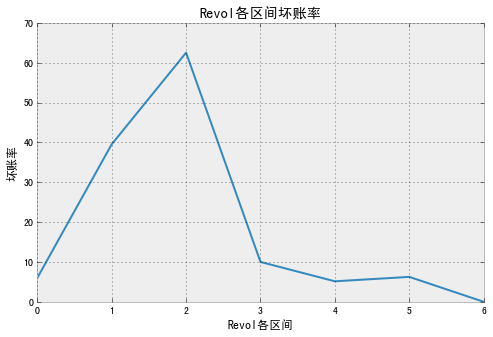

In [88]:
# 确定透支情况下的最大比例
RevoList = [(0,1),(1,10),(10,30),(30,100),(100,5000),(5000,10000),(10000,52000)]
RevoBadRateList = []

for n,elem in enumerate(RevoList):
    Revol = data_train.loc[(data_train['Revol']>=elem[0])
                           &(data_train['Revol']<elem[1])]
    RevoBadRateList.append(Revol[Revol['IsDlq']==1].shape[0]*100/Revol.shape[0])
    print('{0}到{1}之间的样本数为：{2} ------ 坏账率为：{3}%'.format(elem[0],elem[1],Revol.shape[0],round(RevoBadRateList[n],2)))
    
f,ax=plt.subplots(figsize=(8,5))
plt.plot(RevoBadRateList)
ax.set_title('Revol各区间坏账率')
ax.set_xlabel('Revol各区间')
ax.set_ylabel('坏账率')
plt.show()

**结论：**

根据观察的现象，我们可以看到：

0-1之间的坏账率为5.99%。按理说，随着比例升高，坏账率也应该升高，尤其是在透支的情况下。在1-30区间内，已经属于透支状态，坏账率39%，达到了最高。但是透支是不可能无限升高的，会有个阈值。
从30到100区间，坏账率开始下降，坏账率开始下降恢复正常，说明30左右的值（即3000%左右）可能就是正常透支的阈值。

因此，**将数值超过30的都定义为异常值，**并将大于30的值与0-1之间合并。

In [91]:
print('Dependents的缺失值数量为：{0}'.format(data_train[data_train['NumDependents'].isnull()].shape[0]))
print('Dependents的缺失率为：{0}%'.format(round(data_train[data_train['NumDependents'].isnull()].shape[0]*100/data_train.shape[0],2)))

Dependents的缺失值数量为：3924
Dependents的缺失率为：2.62%


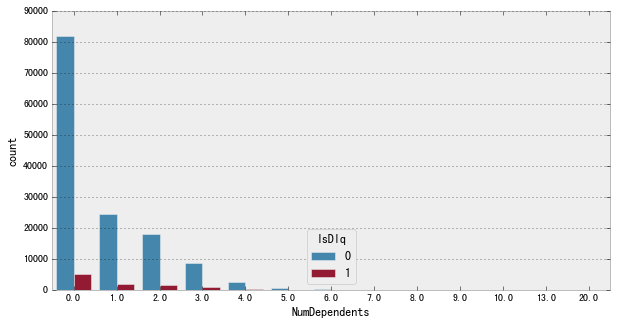

Dependents为0的概率为：57.93%


In [94]:
f,ax=plt.subplots(figsize=(10,5))
sns.countplot(x='NumDependents',hue='IsDlq',data=data_train,ax=ax)
plt.show()
print('Dependents为0的概率为：{0}%'.format(round(data_train[data_train['NumDependents']==0].shape[0]*100/data_train.shape[0],2)))

/home/python/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


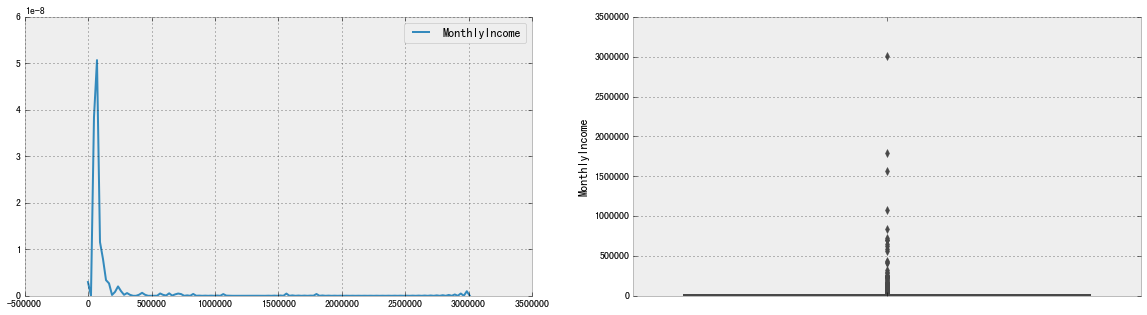

In [95]:
f,[ax1,ax2]=plt.subplots(1,2,figsize=(20,5))
sns.kdeplot(data_train['MonthlyIncome'],ax=ax1)
sns.boxplot(y='MonthlyIncome',data=data_train,ax=ax2)
plt.show()